# Utilities

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PyParkTiff import SaveParkTiff
def readTiffTxt(fileName):
    df = pd.read_csv(fileName, delimiter = '\t', skiprows = 6)
    mapx = {}
    mapy = {}
    posx = 0
    for item in df.index:
        if item not in mapx:
            mapx[item] = posx
            posx+=1;
    posy = 0
    for item in df.iloc[:, 1].values:
        if item not in mapy:
            mapy[item] = posy
            posy+=1;
    img = []
    for i in range(posx):
        img.append([0. for j in range(posy)])
    for row in df.iterrows():
        x = row[0]
        y = row[1][1]
        img[mapx[x]][mapy[y]] = row[1][3]
    return np.flipud(np.asarray(img).T)

def rotation(img1, img2, thetaDegree):
    theta = thetaDegree * np.pi / 180
    img1_ret = img1*np.cos(theta) + img2*np.sin(theta)
    img2_ret = -img1*np.sin(theta) + img2*np.cos(theta)
    return img1_ret, img2_ret

# Reading txt files exported from Tiff XEI

In [75]:
img1 = readTiffTxt('201118_044_ADC AUX2001 copy.txt')
img2 = readTiffTxt('201118_044_ADC AUX3001 copy.txt')

# Phase shift with thetaDegree

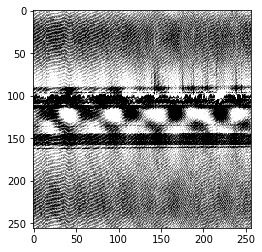

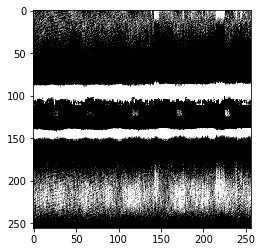

In [106]:
thetaDegree = 90
img1_rot, img2_rot = rotation(img1, img2, thetaDegree = thetaDegree)
plt.figure()
plt.imshow(img1_rot, vmin = -10, vmax = 10, cmap = 'gray')
plt.figure()
plt.imshow(img2_rot, vmin = 0, vmax = 10, cmap = 'gray')


color choices:
Colormap brown is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, winter, winter_r

# Save tiff files

In [107]:
name1 = 'saved1.tiff'
name2 = 'saved2.tiff'
xsize = 10
ysize = 10
SaveParkTiff(img1_rot, xsize, ysize, name1)
SaveParkTiff(img2_rot, xsize, ysize, name2)